# Transfer Learning for Universal Digit Classification

In [1]:
import tensorflow.keras 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout, Conv2D, BatchNormalization, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

/opt/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dty

### Kannada is the main language spoken in Karnataka (~60 million speakers) 
### It belongs to the Dravidian language family spoken largely in southern India  

In [ ]:
dravidian_lang = image.load_img('Dravidische_Sprachen.png')
dravidian_lang

# Credit: BishkekRocks, distributed under a CC-BY_SA 3.0 license.

### The Kannada MNIST dataset was recently published (Vinay Uday Prabhu)
#### https://arxiv.org/abs/1908.01242
#### https://github.com/vinayprabhu/Kannada_MNIST

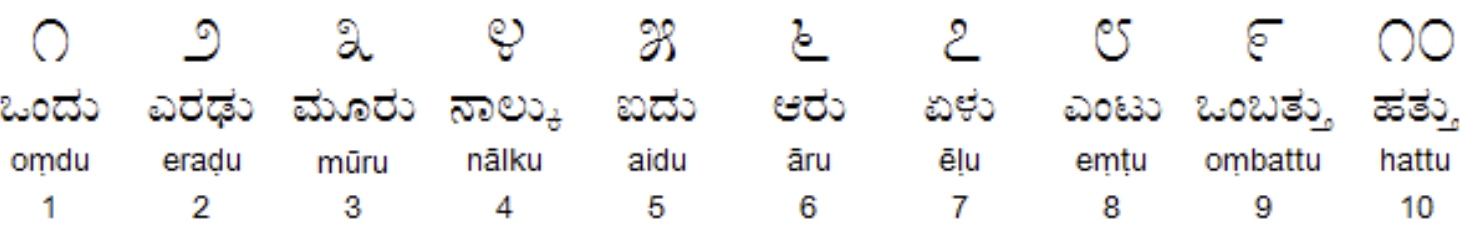

In [3]:
img = image.load_img('kannada_mnist.png')
img

### This project aims to train a Convolutional Neuronal Network on the english MNIST (Arabic numerals)
### and apply transfer learning to classify the digits from the kannada MNIST dataset 
#### (TensorFlow implementation)

In [4]:
# Load Kannada MNIST Data

train_kn = pd.read_csv('kannada_mnist_train.csv')
test_kn = pd.read_csv('kannada_mnist_test.csv')

In [5]:
train_kn.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
xtrain_kn = train_kn.iloc[:, 1:].values.astype('float32') / 255
ytrain_kn = train_kn.iloc[:, 0] # labels

In [7]:
xtest_kn = test_kn.iloc[:, 1:].values.astype('float32') / 255
ytest_kn = test_kn.iloc[:, 0] # labels

In [8]:
xtrain_kn = xtrain_kn.reshape(-1, 28, 28,1)
ytrain_kn = to_categorical(ytrain_kn)
xtest_kn = xtest_kn.reshape(-1, 28, 28,1)
ytest_kn = to_categorical(ytest_kn)

In [9]:
xtrain_kn.shape, xtest_kn.shape

((60000, 28, 28, 1), (5000, 28, 28, 1))

In [10]:
# Load English MNIST Data

(xtrain_en, ytrain_en), (xtest_en, ytest_en) = mnist.load_data()

In [11]:
xtrain_en.shape, xtest_en.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
xtrain_en = xtrain_en / 255.0
xtest_en = xtest_en / 255.0

In [13]:
xtrain_en = xtrain_en.astype(np.float32)
xtrain_en = xtrain_en.reshape(60000, 28, 28, 1)
ytrain_en = to_categorical(ytrain_en)
xtrain_en.shape, ytrain_en.shape

((60000, 28, 28, 1), (60000, 10))

In [14]:
xtest_en = xtest_en.astype(np.float32)
xtest_en = xtest_en.reshape(10000, 28, 28, 1)
ytest_en = to_categorical(ytest_en)
xtest_en.shape, ytest_en.shape

((10000, 28, 28, 1), (10000, 10))

### Training model to the english MNIST (Arabic numerals) dataset

In [15]:
K.clear_session()
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', mode = 'min', patience=10)

In [16]:
# Model: 2D Convolutional Neuronal Network 

model = Sequential([
    # First convolutional layer
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
          input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05),
    
    # Second convolutional layer
    Conv2D(filters=16, kernel_size=(3, 3), padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05),
    
    Flatten(),
    Dense(10),
    BatchNormalization(),
    Activation('softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
__________

In [19]:
# Compile Model

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# SGD performed marginally better than Adam 

In [20]:
# Train Model on English MNIST

history_en = model.fit(xtrain_en, ytrain_en, batch_size=64, epochs=100, 
                   validation_split=0.2, callbacks=[callback])

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
48000/48000 [==============================] - 24s 503us/sample - loss: 0.6661 - acc: 0.8800 - val_loss: 0.3648 - val_acc: 0.9579
Epoch 2/100
48000/48000 [==============================] - 23s 469us/sample - loss: 0.3464 - acc: 0.9455 - val_loss: 0.2166 - val_acc: 0.9703
Epoch 3/100
48000/48000 [==============================] - 22s 453us/sample - loss: 0.2551 - acc: 0.9566 - val_loss: 0.1703 - val_acc: 0.9751
Epoch 4/100
48000/48000 [==============================] - 21s 447us/sample - loss: 0.2060 - acc: 0.9629 - val_loss: 0.1317 - val_acc: 0.9787
Epoch 5/100
48000/48000 [==============================] - 23s 471us/sample - loss: 0.1765 - acc: 0.9668 - val_loss: 0.1149 - val_acc: 0.9794
Epoch 6/100
48000/48000 [==============================] - 22s 463us/sample - loss: 0.1562 - acc: 0.9702 - val_loss: 0.1085 - val_acc: 0.9813
Epoch 7/100
48000/48000 [=========================

In [21]:
# Training Scores: Loss and Accuracy

model.evaluate(xtrain_en, ytrain_en)

60000/60000 [==============================] - 4s 69us/sample - loss: 0.0162 - acc: 0.9969


[0.016227519918838515, 0.99685]

In [22]:
# Test Scores: Loss and Accuracy

model.evaluate(xtest_en, ytest_en)

10000/10000 [==============================] - 1s 70us/sample - loss: 0.0295 - acc: 0.9914


[0.029522190353553742, 0.9914]

### Training and Test accuracy scores were >99% with this CNN

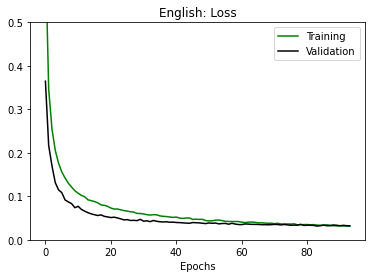

In [23]:
# Plot Loss

loss = history_en.history['loss']
val_loss = history_en.history['val_loss']
epochs = range(0, len(loss))
plt.plot(epochs, loss, 'g', label='Training')
plt.plot(epochs, val_loss, 'k', label='Validation')
plt.title('English: Loss')
plt.xlabel('Epochs')
plt.ylim(0, 0.5)
plt.legend()
plt.show()

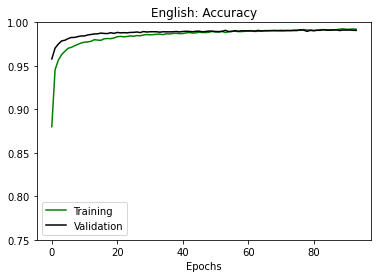

In [24]:
# Plot Accuracy

accuracy = history_en.history['acc']
val_accuracy = history_en.history['val_acc']
epochs = range(0, len(accuracy))
plt.plot(epochs, accuracy, 'g', label='Training')
plt.plot(epochs, val_accuracy, 'k', label='Validation')
plt.title('English: Accuracy')
plt.xlabel('Epochs')
plt.ylim(0.75, 1)
plt.legend()
plt.show()

### Freezing layers

In [25]:
model.layers[0].trainable = False  
model.layers[1].trainable = False  
model.layers[2].trainable = False  
model.layers[3].trainable = False  
model.layers[4].trainable = False  
model.layers[5].trainable = False  
model.layers[6].trainable = False  
model.layers[7].trainable = False  
model.layers[8].trainable = False  
model.layers[9].trainable = False  
model.layers[10].trainable = False  

### Fitting model to Kannada MNIST

In [27]:
history_kn = model.fit(xtrain_kn, ytrain_kn, batch_size=64, epochs=100, 
                   validation_split=0.2, callbacks=[callback])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 23s 487us/sample - loss: 0.2056 - acc: 0.9411 - val_loss: 0.0464 - val_acc: 0.9869
Epoch 2/100
48000/48000 [==============================] - 24s 505us/sample - loss: 0.0893 - acc: 0.9743 - val_loss: 0.0361 - val_acc: 0.9894
Epoch 3/100
48000/48000 [==============================] - 25s 530us/sample - loss: 0.0744 - acc: 0.9794 - val_loss: 0.0303 - val_acc: 0.9908
Epoch 4/100
48000/48000 [==============================] - 26s 532us/sample - loss: 0.0652 - acc: 0.9829 - val_loss: 0.0313 - val_acc: 0.9901
Epoch 5/100
48000/48000 [==============================] - 25s 521us/sample - loss: 0.0583 - acc: 0.9843 - val_loss: 0.0293 - val_acc: 0.9910
Epoch 6/100
48000/48000 [==============================] - 25s 521us/sample - loss: 0.0538 - acc: 0.9860 - val_loss: 0.0273 - val_acc: 0.9914
Epoch 7/100
48000/48000 [==============================] - 25s 525us/sample - loss: 0.0503 - acc: 

Epoch 57/100
48000/48000 [==============================] - 24s 510us/sample - loss: 0.0192 - acc: 0.9955 - val_loss: 0.0167 - val_acc: 0.9948
Epoch 58/100
48000/48000 [==============================] - 24s 496us/sample - loss: 0.0199 - acc: 0.9952 - val_loss: 0.0187 - val_acc: 0.9943
Epoch 59/100
48000/48000 [==============================] - 24s 493us/sample - loss: 0.0189 - acc: 0.9953 - val_loss: 0.0190 - val_acc: 0.9942
Epoch 60/100
48000/48000 [==============================] - 24s 504us/sample - loss: 0.0192 - acc: 0.9954 - val_loss: 0.0185 - val_acc: 0.9942
Epoch 61/100
48000/48000 [==============================] - 24s 509us/sample - loss: 0.0195 - acc: 0.9952 - val_loss: 0.0177 - val_acc: 0.9948
Epoch 62/100
48000/48000 [==============================] - 24s 506us/sample - loss: 0.0189 - acc: 0.9954 - val_loss: 0.0170 - val_acc: 0.9946


In [28]:
model.evaluate(xtrain_kn, ytrain_kn)

60000/60000 [==============================] - 4s 69us/sample - loss: 0.0084 - acc: 0.9981


[0.008407828818447888, 0.9981]

In [29]:
#model.evaluate(xtest_kn, ytest_kn)

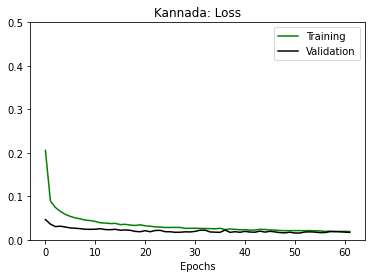

In [30]:
# Plot Loss

loss = history_kn.history['loss']
val_loss = history_kn.history['val_loss']
epochs = range(0, len(loss))
plt.plot(epochs, loss, 'g', label='Training')
plt.plot(epochs, val_loss, 'k', label='Validation')
plt.title('Kannada: Loss')
plt.xlabel('Epochs')
plt.ylim(0, 0.5)
plt.legend()
plt.show()

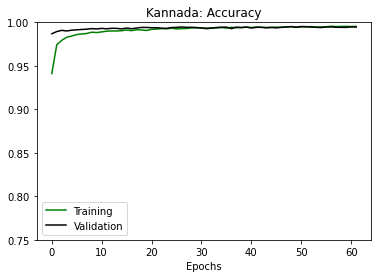

In [31]:
# Plot Accuracy

accuracy = history_kn.history['acc']
val_accuracy = history_kn.history['val_acc']
epochs = range(0, len(accuracy))
plt.plot(epochs, accuracy, 'g', label='Training')
plt.plot(epochs, val_accuracy, 'k', label='Validation')
plt.title('Kannada: Accuracy')
plt.xlabel('Epochs')
plt.ylim(0.75, 1)
plt.legend()
plt.show()

# CNN reliably (>99% accuracy) classifies Kannada numerals 
# after training on Arabic numerals